# Caratterizzazione PMT del Trigger

In [3]:
#import delle librerie necessarie

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Incertezze
- Le incertezze sui $\textbf{conteggi}$ sono state considerate poissoniane $\rightarrow$ $\delta N = \sqrt{N_{count}}$

## Plateau PMT BLU

Sono state eseguite misure di conteggio al variare di tensione di alimentazione del PMT Blu tenendo il PMT verde a tensione $V_{ref} = 1608$ $V$ con una tensione $V_{th} = -80$ $mV$, ottenendo il seguente risultato


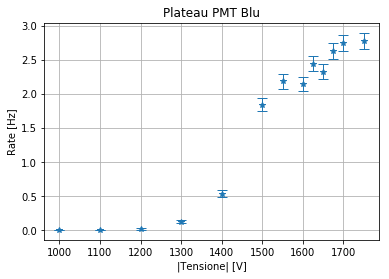

In [4]:
dataBLU = np.loadtxt("../Trigger/plateauBLUsalita.txt") #in realtà sono le misure in discesa...

plt.grid()
plt.title("Plateau PMT Blu")
plt.xlabel("|Tensione| [V]")
plt.ylabel("Rate [Hz]")
plt.errorbar(dataBLU[: , 0] , dataBLU[: , 3]/200 , yerr = np.sqrt(dataBLU[: , 3])/200 , fmt = "*" , capsize = 5 , elinewidth = 1)
plt.show()



E' stata quindi valutata come tensione di lavoro circa $V_{lavoro} = 1700$ $V$

## Plateau PMT VERDE
Analogamente a prima sono state eseguite misure di conteggio di coincidenza tenendo fisso il PMT Blu a una tensione $V_{ref} = 1600$ $V$  con $V_{th} = -80$ $mV$ e variando la tensione del PMT verde, ottenendo

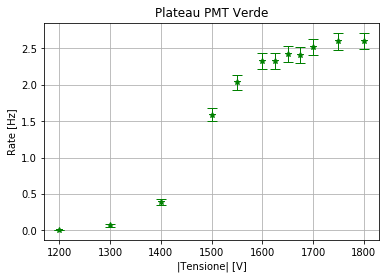

In [9]:
dataVERDE = np.loadtxt("../Trigger/CoincidenzeplateauVERDE.txt")

plt.grid()
plt.title("Plateau PMT Verde")
plt.xlabel("|Tensione| [V]")
plt.ylabel("Rate [Hz]")
plt.errorbar(dataVERDE[: , 0] , dataVERDE[: , 1]/200 , yerr = np.sqrt(dataVERDE[: , 1])/200 , fmt = "*" , capsize = 5 , elinewidth = 1 , color = 'green')
plt.show()


per cui è stata considerata come tensione di lavoro circa $V_{lavoro} = 1700$ $V$

## Misura della Soglia ottimale
Fissando entrambi i PMT a tensione di lavoro $V_{lavoro} = 1700$ $V$ e variando la tensione di soglia dei discriminatori è stato ottenuto il seguente grafico

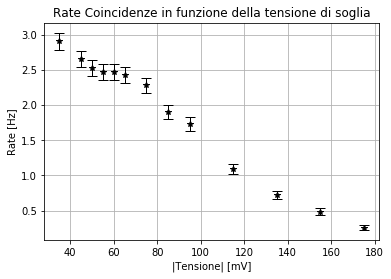

In [6]:
dataT = np.loadtxt("../Trigger/trashcontappi.txt")

plt.grid()
plt.title("Rate Coincidenze in funzione della tensione di soglia")
plt.xlabel("|Tensione| [mV]")
plt.ylabel("Rate [Hz]")
plt.errorbar(dataT[: , 0] , dataT[: , 3]/200 , yerr = np.sqrt(dataT[: , 3])/200 , fmt = "*" , capsize = 5 , elinewidth = 1 , color = 'black')
plt.show()


Dal grafico precedente si osserva una tensione di soglia ottimale in corrispondenza del plateau tra $[50,60] $ $mV$, per cui si stima una tensione di soglia ottimale intorno ai $V_{th} = -60$ $mV$

## Ulteriori Misure del Rate
- PMT sovrapposti con area attiva di $(10x10)$ $cm^2$ a una tensione $V_{lavoro} = 1700$ $V$ e la soglia a $V_{th} = -60$ $mV$ , $\tau_{acqu} = 10$ $min$: 
    - ContiBLU = 9835     
    - ContiVERDE = 8701    
    - Coincidenze = 834
    - Numero atteso di coincidenze casuali = 0.028
- PMT sovrapposti come al punto precedente ma a una distanza di $46$ $cm$ in modo da simulare la configurazione sperimentale finale, ottenendo (con $V_{lavoro} = 1700$ $V$ e $V_{th} = -60$ $mV$ , $\tau = 10$ $min$): 
    - ContiBLU = 10297    
    - ContiVERDE = 8085    
    - Coincidenza = 110
    - Numero atteso di coincidenze casuali = 0.028
- PMT separati per contare le coincidenze casuali, stesse condizioni delle misure precedenti ma con $\tau = 30$ $min$, ottenendo:
    - ContiBLU = 30881    
    - ContiVERDE = 27430    
    - Coincidenze = 27   
    - Numero atteso di coincidenze casuali = 0.094

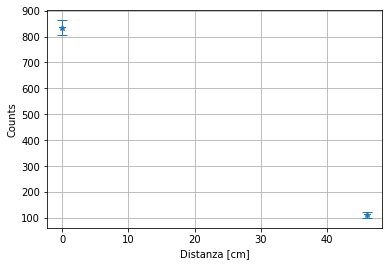

In [7]:
dataBoh = np.loadtxt("../Trigger/boh.txt")
plt.grid()
#plt.title("Rate Coincidenze in funzione della tensione di soglia")
plt.xlabel("Distanza [cm]")
plt.ylabel("Counts")
plt.errorbar(dataBoh[: , 0] , dataBoh[: , 3] , yerr = np.sqrt(dataBoh[: , 3]) , fmt = "*" , capsize = 5 , elinewidth = 1)
plt.show()

## Calcoliamo l'angolo solido della misura con due scintillatori a distanza 46 cm
Consideriamo l'angolo solido di un cilindro la cjui base ha per raggio metà del lato della superficie attiva degli scintillatori (5 cm), e altezza i 46 cm corrispondenti alla loro distanza  
$$ 2 \Omega=\displaystyle{\int_0^{2 \pi}} d \theta \displaystyle{\int_0^{\phi_{max}}} d \phi \sin(\phi)= 2 \pi(1-\cos(2 \tan^{-1}( \frac{2R}{h})))$$ 
$$\Omega=0.283$$

## Calcolo teorico della rate
Per una superficie attiva di 100 $cm^2$ e considerando l'angolo solido calcolato, troviamo la rate attesa usando il flusso di muoni noto $ Flux= 80 m^{-2} s^{-1} sr^{-1}$, e poi il numero di conteggi atteso per un tempo di misura di 10 minuti

$rate= Flux \cdot 100 cm^2 \cdot \Omega=0.226 s^{-1}$

$conteggi_{theo} = 0.226 \cdot 600=135.6$

$conteggi_{exp}=110 \pm 10 $

Daje

Quando invece i due scintillatori sono sovrapposti e a contatto, sempre con stessa superficie attiva, abbiamo un flusso $Flux_2=130 m^{-2}s^{-1}$, e confrontiamo i valori con il caso precedente

$rate= Flux_2 \cdot 100cm^{2}= 1.3 s^{-1}$

$conteggi_{theo}=rate*600 s= 780$

$conteggi_{exp}=834 \pm 28$

In [8]:
200*(1E-9)*30881*27430/(1800*1800)*1800

0.09411842555555557